In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join('../../src'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/enis/projects/nna/src


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import time
import copy
from sklearn.preprocessing import minmax_scale



import csv 
from pathlib import Path
from os import listdir
import pickle

from labeling_utils import load_labels

import numpy as np
from sklearn.metrics import precision_recall_fscore_support

from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from datetime import datetime,timedelta
import math

import itertools
from matplotlib.pyplot import cycler
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.cm

from labeling_utils import read_file_properties

import pickle


import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
# from matplotlib.dates import AutoDateLocator
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter

# import matplotlib.pyplot as plt

from matplotlib import cm
from numpy import linspace


from pytz import timezone


In [3]:
from pre_process_func import read_queue


ModuleNotFoundError: No module named 'pre_process_func'

In [2]:
# INPUT_DIR_PARENT = "/home/data/nna/stinchcomb/NUI_DATA/"


In [419]:
with open("/home/enis/projects/nna/mp3files.txt","r") as mp3files:
    mp3files=mp3files.readlines()
    mp3files=[i.strip() for i in mp3files]

thelen=([Path(file).stem for file in mp3files])
theset=(set([Path(file).stem for file in mp3files]))
for a in theset:
    del thelen[thelen.index(a)]
print(thelen)

mp3filesset=list()
mp3filestemset=[]
for file in mp3files:
    if Path(file).stem not in mp3filestemset:
        mp3filestemset.append(Path(file).stem)
        mp3filesset.append(file)
mp3files=mp3filesset[:]

file_properties,exceptions=read_file_properties(mp3files)

['UMIRUK_20160621_083400', 'UMIRUK_20160623_101515', 'CLVL4_20160623_084159', 'CLVL4_20160606_191142', 'CLVL4_20160602_154908', 'CLVL4_20160621_070042', 'CLVL4_20160608_205258', 'CLVL4_20160619_051925', 'CLVL4_20160615_015650', 'CLVL4_20160604_173026', 'CLVL4_20160610_223415', 'CLVL4_20160602_153918', 'CLVL4_20160617_033807', 'CLVL4_20160613_001533']


In [466]:
weather={}

with open("weather_data.pkl","rb") as wdata:
    wdata=pickle.load(wdata)

    
# we add tmstamp_valid":tmstamp_valid to data
weather_id_name={"temp":"temp", 
                 "pressure":"pressure",
                 "wspd":"windspeed",
                "precip_hrly":"Precipitation",
                "vis":"Visibility"}
weather_cols=list(weather_id_name.values())



#correct time zones and filter unwanted data from each day
filtered_data=[]
for data in wdata:
    tmstamp_valid = datetime.fromtimestamp(time.mktime(time.gmtime(data["valid_time_gmt"])))
    tmstamp_valid=tmstamp_valid.astimezone(timezone('US/Alaska'))
    tmstamp_exp = datetime.fromtimestamp(time.mktime(time.gmtime(data["expire_time_gmt"])))
    tmstamp_exp=tmstamp_exp.astimezone(timezone('US/Alaska'))
    

    filtered_dict={"tmstamp_valid":tmstamp_valid}
    for ID in weather_id_name:
        filtered_dict[weather_id_name[ID]]=data[ID]
    
    filtered_data.append(copy.deepcopy(filtered_dict))

#     print(tmstamp_valid,"---",tmstamp_exp,)
#     break

weather=pd.DataFrame(filtered_data).set_index('tmstamp_valid').tz_localize(None)

In [467]:
weather.columns

Index(['temp', 'pressure', 'windspeed', 'Precipitation', 'Visibility'], dtype='object')

In [468]:
weather=weather[["Precipitation"]]


In [469]:
count=0
feature="precip_hrly"
for i,data in enumerate(wdata):
    if data[feature]:# and data[feature]<10:
        count+=1
#         print(data[feature],i)
print(count,len(wdata))
# wdata[2175]


290 3496


In [470]:
# weather["Visibility"].mean()

In [471]:
with open("coordinates.csv") as cordinate:
    r=csv.reader(cordinate)
    lines=list(r)

#     lines=r.readlines()
#lat long
cord= {i[2]:(i[1],i[0]) for i in lines[1:]}

# site ids to names conversion
id2name={}
for val in file_properties.values():
#     print(val["site_id"],val["site_name"])
    if len(val["site_name"])>0:
        id2name[val["site_id"]]=val["site_name"]

        


In [472]:

# tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Vehicle","Aircraft"]
tags=["Songbird","Water Bird","Insect","Running Water","Rain","Cable","Wind","Aircraft"]

tag_set=tags[:]



# # LOAD LABELS by human
# labelsbyhumanpath=Path('/scratch/enis/data/nna/labeling/results/')
# # filter by username
# labelsbyhuman=[i for i in listdir(labelsbyhumanpath) if (".csv" in i) ]

# humanresults={}
# counter=0
# for apath in labelsbyhuman:
#     with open(labelsbyhumanpath / apath, newline='') as f:
#         reader=csv.reader(f)
#         for row in reader:
#             counter+=1
#             humanresults[row[0]]=row[1:]

# print("unique files:",len(humanresults),"\ntotal files",counter)

# #Join vehicle and Aircraft
# for file_name,tagshere in humanresults.items():
# #     print(file_name,tagshere)
    
#     tagshere=["Aircraft" if tag == "Vehicle" else tag for tag in tags]

In [473]:
selected_areas=['CLVL5',
'ITKILLIK2',
'CLVL4',
'UMIAT',
'OCNPT',
'CLVL2',
'ITKILLIK1',
'USGS']
selected_areas_dict= { i:[] for i in selected_areas}

for key,f in file_properties.items():
    if f["site_id"] in selected_areas:
        selected_areas_dict[f["site_id"]].append(key)
#         print(f)
        
    


for files49 in selected_areas_dict.values():
    for file in files49:
#         print(file)
        x=file_properties[file]
#         print(x)
        hour_min_sec=x["hour_min_sec"]
        hour=int(hour_min_sec[:2])
        minute=int(hour_min_sec[2:4])
        second=int(hour_min_sec[4:6])
        year = int(x["year"])
        if year==2013:
            year=2016
        mm=datetime(year, int(x["month"]), int(x["day"]), hour=hour, minute=minute, second=second, microsecond=0)
        x["timestamp"]=mm
#         x["timedelta"] = timedelta(seconds=total[Path(mp3file)])


# IMPORTANT, we use order as timeline
for i,area in enumerate(selected_areas_dict):
#     print(mp3files_unsorted)
    selected_areas_dict[area]=list(set(selected_areas_dict[area]))
    selected_areas_dict[area].sort( key=lambda x: file_properties[Path(x)]["timestamp"])   


In [428]:
model_tag_names=["Neural Net_Songbird",
"Neural Net_Water Bird",
"Neural Net_Insect",
"Neural Net_Running Water",
"Neural Net_Rain",
"Neural Net_Cable",
"Neural Net_Wind",
"Neural Net_Aircraft",]

In [429]:
inference_file="/scratch/enis/data/nna/labeling/8tags_on_8sites.npy"
gathered_results_perTag=np.load(inference_file,allow_pickle=True)[()]



In [474]:
model_tag_name='Neural Net_'
tag_name='Rain'
gathered_results=gathered_results_perTag[model_tag_name+tag_name]

In [475]:
# PARAMS
# FREQS to reduce results 
freq="2H"


In [476]:
times=[]
# FIND earliest and latest time for time scale
# lists in selected_areas_dict is ordered by time
for i,area in enumerate(selected_areas_dict):
    # get timestamp values from file_properties
    start=selected_areas_dict[area][0]
    end=selected_areas_dict[area][-1]
#     print((start,end))

    start=file_properties[Path(start)]["timestamp"]
    end=file_properties[Path(end)]["timestamp"]
#     print(start,end)
    times.extend([start,end])

times.sort()
all_start=times[0].replace(hour=0,minute=0,second=0)
all_end=times[-1].replace(hour=23,minute=59,second=59)




def days_hours_minutes(td):
    return td.days, td.seconds//3600, (td.seconds//60)%60

#create date axis indexes depending on start,end along with frequency
if "H" in freq:
    number_hours=3600
    count=int(freq[:-1])
    extra=math.ceil(3/count)
    index = pd.date_range(all_start, periods=((all_end-all_start).total_seconds()//(number_hours*count)+48), freq=freq)
if "D" in freq:
    index = pd.date_range(all_start, periods=(all_end-all_start).days+3, freq=freq)


columns=selected_areas+weather_cols
df_sums = pd.DataFrame(index=index, columns=selected_areas).fillna(0)
df_count = pd.DataFrame(index=index, columns=selected_areas).fillna(0)
# df_T = pd.DataFrame(index=index, columns=weather_cols).fillna(0)


In [517]:
# weather

In [516]:
# counts

In [514]:
# for i,val in enumerate(sums["Precipitation"]):
#     print(counts["Precipitation"][i],val,)

In [558]:
# For our events, %100 means, it is detected constantly for two hours, but thats not the case for the weather.
# For weather data we do not have second by second information, just hourly, sometimes every half an hour.
# I take average value of Precipitation per 2 hours. 
# Then I normalize Precipitation values. 
# So %100 participation does not mean it did rain for 2 hours. 
# It means that this specific day have highest amount of rain over the summer.

counts = weather.groupby([pd.Grouper(freq=freq)]).count()
sums=weather.groupby([pd.Grouper(freq=freq)]).sum()
avg_weather=sums/counts

# ??? NORMALIZE weather 
normal_weather=(avg_weather-avg_weather.min())/(avg_weather.max()-avg_weather.min())
normal_weather=normal_weather*100

# pd.ones()
# SPECIAL for rain :
if "Precipitation" in normal_weather:
    normal_weather=sums.where((sums<=0),100)

In [559]:
(all_end-all_start).total_seconds()//number_hours

2471.0

In [560]:
(all_end-all_start).days

102

In [561]:
all_end,all_start

(datetime.datetime(2016, 9, 12, 23, 59, 59),
 datetime.datetime(2016, 6, 2, 0, 0))

In [562]:
df_afile.groupby([pd.Grouper(freq=freq)]).sum()

,Bird
2016-08-21 08:00:00,0.0


In [563]:
for i,area in enumerate(selected_areas_dict):
    for afile in selected_areas_dict[area]:
        data=gathered_results[afile]
        start=file_properties[Path(afile)]["timestamp"]
        columns=[]
#         print(data.shape)
        for i,point in enumerate(data):
            timepoint=start+timedelta(seconds=(10*i))
            columns.append(timepoint)
        
        df_afile=pd.DataFrame(data,index=columns, columns=["Bird"])
        counts = df_afile.groupby([pd.Grouper(freq=freq)]).count()
        sums=df_afile.groupby([pd.Grouper(freq=freq)]).sum()
#         print(counts,"test",sums)
        for i in counts.index:
            
            df_count.loc[i][area]+= counts.loc[i]
            df_sums.loc[i][area]+= sums.loc[i]
        

In [564]:
df_sums.sum()

CLVL5         67671
ITKILLIK2     44268
CLVL4         39198
UMIAT        125127
OCNPT         75570
CLVL2         43752
ITKILLIK1     80649
USGS          67689
dtype: int64

In [565]:
df_freq=df_sums/df_count
del df_freq['UMIAT']

df_freq=df_freq*100
df_freq=df_freq.dropna(how='all')
df_freq=pd.concat([df_freq, normal_weather], axis=1, join='inner')

In [566]:
# df_freq=df_sums[:]
# df_freq=pd.concat([df_freq, sums], axis=1, join='outer')

In [567]:
# df_freq=(df_freq-df_freq.min())/(df_freq.max()-df_freq.min())


In [568]:
df_freq.sum()

CLVL5             3137.393167
ITKILLIK2         2073.692599
CLVL4             1915.203501
OCNPT             3507.384485
CLVL2             2123.184720
ITKILLIK1         3761.348645
USGS              3156.512361
Precipitation    11000.000000
dtype: float64

In [569]:
# (df_freq.merge(normal_weather))


In [570]:
df_freq.sum()

CLVL5             3137.393167
ITKILLIK2         2073.692599
CLVL4             1915.203501
OCNPT             3507.384485
CLVL2             2123.184720
ITKILLIK1         3761.348645
USGS              3156.512361
Precipitation    11000.000000
dtype: float64

In [571]:
df_freq.index

DatetimeIndex(['2016-06-02 12:00:00', '2016-06-02 14:00:00',
               '2016-06-02 16:00:00', '2016-06-02 18:00:00',
               '2016-06-02 20:00:00', '2016-06-02 22:00:00',
               '2016-06-03 00:00:00', '2016-06-03 02:00:00',
               '2016-06-03 04:00:00', '2016-06-03 06:00:00',
               ...
               '2016-08-26 14:00:00', '2016-08-26 16:00:00',
               '2016-08-26 18:00:00', '2016-08-26 20:00:00',
               '2016-08-26 22:00:00', '2016-08-27 00:00:00',
               '2016-08-27 02:00:00', '2016-08-27 04:00:00',
               '2016-08-27 06:00:00', '2016-08-27 08:00:00'],
              dtype='datetime64[ns]', length=1031, freq='2H')

In [572]:
weather_cols
# cord_list
cord_list

[('USGS', ('70.4636', '-150.7561')),
 ('ITKILLIK1', ('70.1517', '-150.9547')),
 ('ITKILLIK2', ('70.1055', '-150.8368')),
 ('CLVL2', ('70.0741', '-151.0655')),
 ('OCNPT', ('70.0719', '-151.3822')),
 ('CLVL4', ('70.0002', '-151.5933')),
 ('CLVL5', ('69.8941', '-151.5659')),
 ('Precipitation', ('0', '1'))]

In [573]:
# lat=[69.37,70.4322,70.0036]

for i,ii in enumerate(weather):
    cord[ii]=(str(0),str(1))

# add names of weather lines
for w in weather_cols:
    id2name[w]=w


cord_list=sorted(list(cord.items()),key=lambda x: x[1][0],reverse=True)
# filter it by 
cord_list=list(filter(lambda x: x[0] in df_freq.columns or x[0] in weather_cols ,cord_list))
print(cord.items())
[id2name[x[0]] for x in cord_list],cord_list

#     cord_list.append((ii,(lat[i],1)))



dict_items([('NIGLIQ2', ('70.3312', '-151.0809')), ('NIGLIQ1', ('70.2422', '-151.0004')), ('ICERD', ('70.2365', '-150.8255')), ('CD3', ('70.3324', '-150.7147')), ('FSHCK2', ('70.2967', '-151.2875')), ('FSHCK1', ('70.3599', '-151.2919')), ('ITKILLIK1', ('70.1517', '-150.9547')), ('FSHCK3', ('70.3161', '-151.486')), ('USGS', ('70.4636', '-150.7561')), ('ITKILLIK2', ('70.1055', '-150.8368')), ('CLVL2', ('70.0741', '-151.0655')), ('FSHCK4', ('70.2727', '-151.6857')), ('OCNPT', ('70.0719', '-151.3822')), ('CLVL4', ('70.0002', '-151.5933')), ('CLVL5', ('69.8941', '-151.5659')), ('UMIRUK', ('69.7955', '-151.5646')), ('ROCKY', ('69.7137', '-151.5077')), ('SHORTY', ('69.637', '-151.4347')), ('ANKTVK', ('69.5459', '-151.4539')), ('UMIAT', ('69.3605', '-152.1234')), ('Precipitation', ('0', '1'))])


(['USGS',
  'Itkillik',
  'Itkillik 2',
  'Colville 2',
  'Ocean Pt',
  'Colville 4',
  'Colville 5',
  'Precipitation'],
 [('USGS', ('70.4636', '-150.7561')),
  ('ITKILLIK1', ('70.1517', '-150.9547')),
  ('ITKILLIK2', ('70.1055', '-150.8368')),
  ('CLVL2', ('70.0741', '-151.0655')),
  ('OCNPT', ('70.0719', '-151.3822')),
  ('CLVL4', ('70.0002', '-151.5933')),
  ('CLVL5', ('69.8941', '-151.5659')),
  ('Precipitation', ('0', '1'))])

In [574]:
months=[df_freq.loc['2016-06-01':'2016-06-30'],df_freq.loc['2016-07-01':'2016-07-31'],df_freq.loc['2016-08-01':'2016-08-31'],]
months2=[df_freq.loc['2016-06-01':'2016-06-30'],df_freq.loc['2016-07-01':'2016-07-31'],df_freq.loc['2016-08-01':'2016-08-31']]

# make them all same month for aligning 
for i,month in enumerate(months):
    months[i]=month.rename(index=lambda x: x.replace(month=7))
    


In [575]:
# for i,month in enumerate(months):
#     print(month)

In [576]:
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or '.'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot'),  # Same as '-.
     ('densely dotted',        (0, (1, 1))),
     ('densely dashed',        (0, (5, 1))),
    ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
# linestyle_tuple = [
#      ('loosely dotted',        (0, (1, 10))),
#      ('dotted',                (0, (1, 1))),
#      ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
#      ('dashed',                (0, (5, 5))),
#      ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
#      ('dashdotted',            (0, (3, 5, 1, 5))),
#      ('densely dashdotted',    (0, (3, 1, 1, 1))),

#      ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
#      ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

In [577]:
cord_list,weather_cols

([('USGS', ('70.4636', '-150.7561')),
  ('ITKILLIK1', ('70.1517', '-150.9547')),
  ('ITKILLIK2', ('70.1055', '-150.8368')),
  ('CLVL2', ('70.0741', '-151.0655')),
  ('OCNPT', ('70.0719', '-151.3822')),
  ('CLVL4', ('70.0002', '-151.5933')),
  ('CLVL5', ('69.8941', '-151.5659')),
  ('Precipitation', ('0', '1'))],
 ['temp', 'pressure', 'windspeed', 'Precipitation', 'Visibility'])

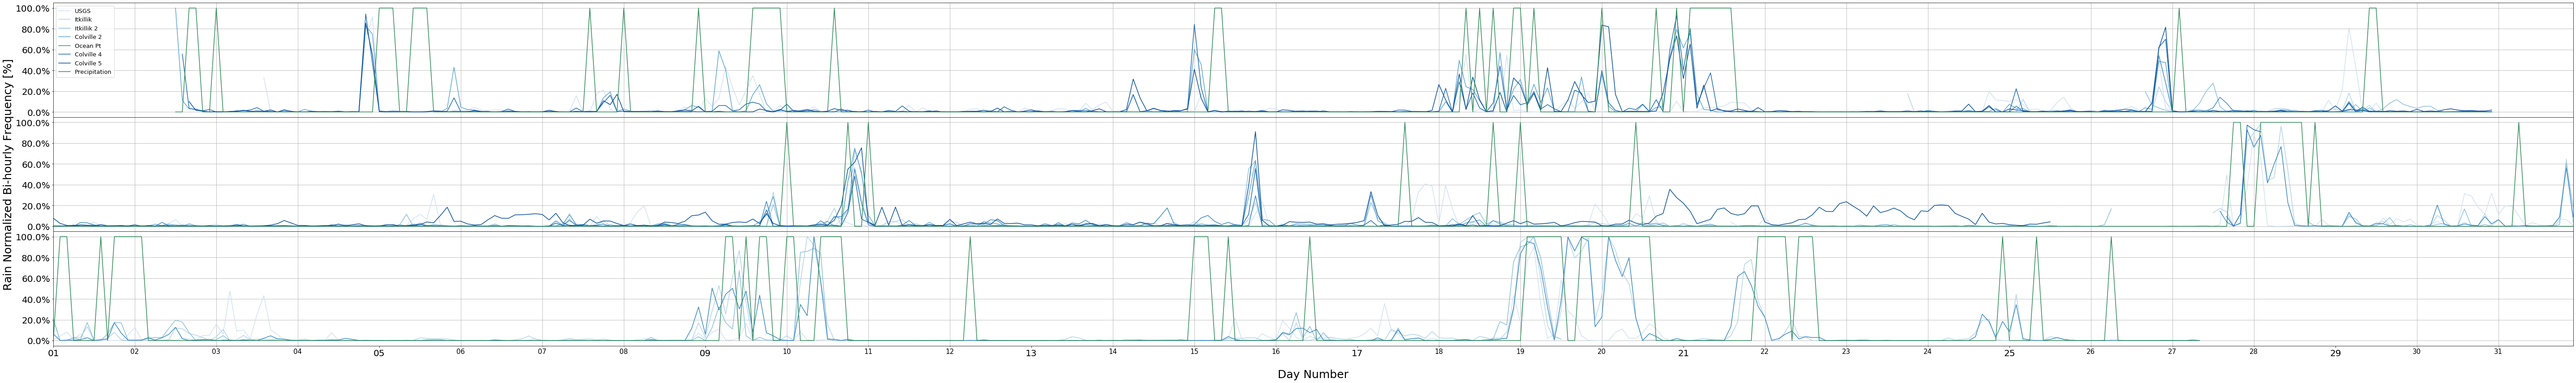

In [578]:

start = 0.1
stop = 0.6
number_of_lines= 8
# cm_subsection = linspace(start, stop, number_of_lines) 

# colors = iter([ cm.jet(x) for x in linspace(start, stop, number_of_lines) ])
plt.rcParams["axes.prop_cycle"] = get_cycle("Blues",N=8)


def splitSerToArr(ser):
    return [ser.index, ser.as_matrix()]

# fig = plt.figure(figsize=(120,6)) 

fig, ax = plt.subplots(figsize=(80,12),nrows=len(months),sharex=True, sharey=True,gridspec_kw={'hspace': 0})
# fig, axes = plt.subplots(nrows=2, ncols=2)


markers = itertools.cycle((',', '+', '.', 'o', '*')) 


# xs = range(df_freq["CLVL5"].shape[0])
# series1 = [1, 3, 3, None, None, 5, 8, 9]
# series2 = [2, None, 5, None, 4, None, 3, 2]

# s1 = pd.Series(df_freq["CLVL5"], index=xs)
# s2 = pd.Series(df_freq["ITKILLIK2"], index=xs)
# for col in df_freq.columns:
#     ax.plot( *splitSerToArr(df_freq[col].dropna()), linestyle='-', marker='o',label=col)
#     plt.plot( *splitSerToArr(df_freq["ITKILLIK2"].dropna()), linestyle='-', marker='o')
weather_colors=["firebrick","darkorange","green","seagreen","lightpink"]
for monthi,month in enumerate(months):
    # for col in df_freq.columns:
    for i,(col,(lat,long)) in enumerate(cord_list):
        if col in weather_cols:
            index=weather_cols.index(col)
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ",color=weather_colors[index])
        else:
            ax[monthi].plot_date(month.index.to_pydatetime(), month[col],linestyle="-",marker=" ")
        

ax[0].legend( labels=[id2name[x[0]] for x in cord_list],loc='upper left', 
            borderpad=0.4, labelspacing=0.5, fontsize=13, 
            frameon=True) # frameon=False to remove frame.

ax[1].set_ylabel('{} Normalized Bi-hourly Frequency [%]'.format(tag_name),fontsize=25) #, fontweight='black')

ax[-1].set_xlabel('Day Number', fontsize=25)


    
for an_ax in ax:
    
    locator=dates.DayLocator()
#     locator.intervald["DAILY"] = [1] 
    an_ax.xaxis.set_minor_locator(locator)
#     an_ax.xaxis.set_minor_locator(dates.HourLocator(byhour=range(0,25), interval=12))

#     an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%H'))
#     an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
    an_ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n'))

    an_ax.xaxis.grid(True, which="minor")


    an_ax.xaxis.set_major_locator(dates.AutoDateLocator())
    an_ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n'))

#     an_ax.xaxis.set_major_formatter(NullFormatter())

#     an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1}%'))
    an_ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x}%'))
    an_ax.yaxis.grid()
    an_ax.tick_params(labelsize=15,which="minor")
    an_ax.tick_params(labelsize=20,which="major")
    
plt.tight_layout()
plt.margins(x=0)


plt.show()
fig.savefig("all_"+tag_name+"_weather_"+freq +'.png')




In [579]:
# df_freq.plot(figsize=(110,6))

In [580]:

# idx = pd.date_range('2011-05-01', '2011-07-01')
# s = pd.Series(np.random.randn(len(idx)), index=idx)

# fig, ax = plt.subplots()
# ax.plot_date(idx.to_pydatetime(), s, 'v-')
# ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(1),
#                                                 interval=1))
# ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
# ax.xaxis.grid(True, which="minor")
# ax.yaxis.grid()
# ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
# plt.tight_layout()
# plt.show()

In [581]:
# sample_per_tick=360
# # result_count=(bird_results.shape[0]//sample_per_tick) if bird_results.shape[0]%sample_per_tick==0 else (bird_results.shape[0]//sample_per_tick)+1
# # bird_results_gathered=np.empty((result_count))
# # for i in range(0,bird_results.shape[0],sample_per_tick):
# #     bird_results_gathered[i//sample_per_tick]= np.sum(bird_results[i:i+sample_per_tick]>0)
    
# #     break
# left=bird_results[-(bird_results.shape[0]%sample_per_tick):]
# rest=bird_results[:-(bird_results.shape[0]%sample_per_tick)]
# rest_gathered = np.sum(rest.reshape(-1, sample_per_tick)>0, axis=1)
# left_gathered =  np.sum(left.reshape(1, -1)>0, axis=1)
# gathered=np.concatenate((rest_gathered,left_gathered))


In [582]:
# gathered_results_copy=copy.deepcopy(gathered_results)

In [583]:
#https://stackoverflow.com/questions/30079590/use-matplotlib-color-map-for-color-cycle


def get_cycle(cmap, N=None, use_index="auto"):
    if isinstance(cmap, str):
        if use_index == "auto":
            if cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']:
                use_index=True
            else:
                use_index=False
        cmap = matplotlib.cm.get_cmap(cmap)
    if not N:
        N = cmap.N
    if use_index=="auto":
        if cmap.N > 100:
            use_index=False
        elif isinstance(cmap, LinearSegmentedColormap):
            use_index=False
        elif isinstance(cmap, ListedColormap):
            use_index=True
    if use_index:
        ind = np.arange(int(N)) % cmap.N
        return cycler("color",cmap(ind))
    else:
        colors = cmap(np.linspace(0.2,1,N))
        return cycler("color",colors)